0.3820682078639251
2.2558082966996658


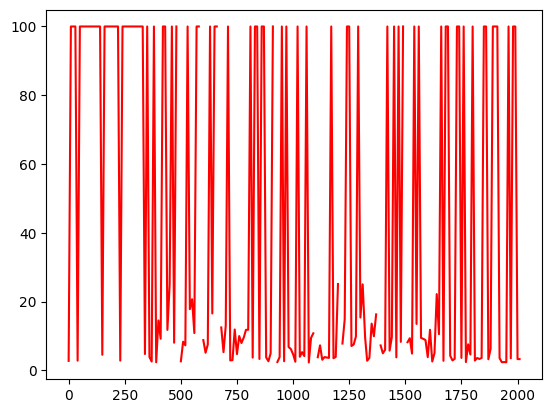

29.389013088960418


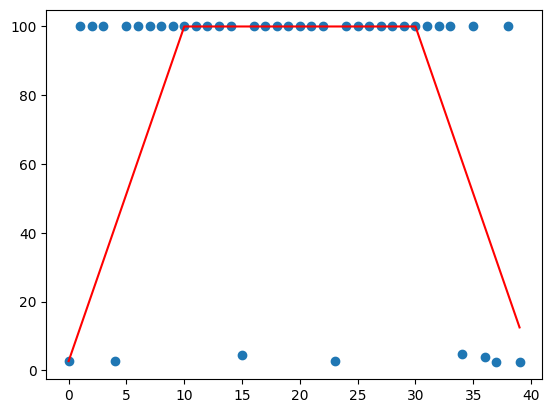

30.34845264979898


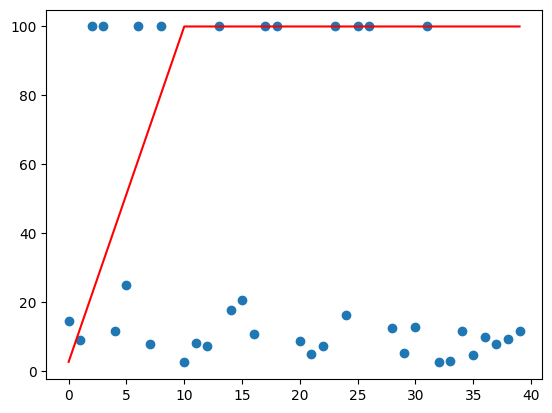

31.873800342932167


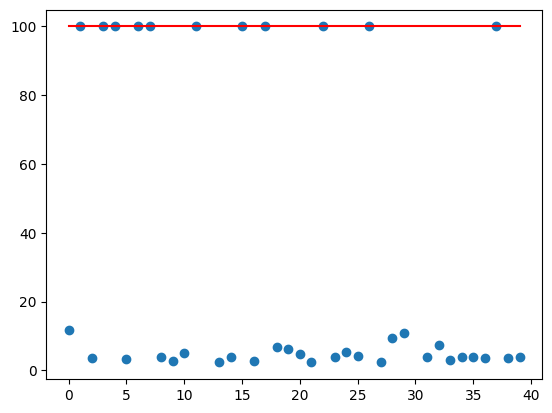

27.043180495209363


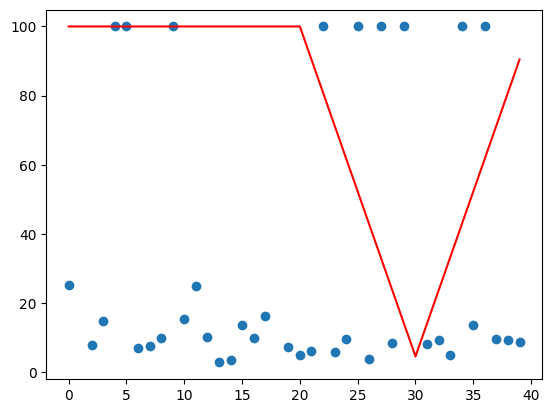

34.546378874393795


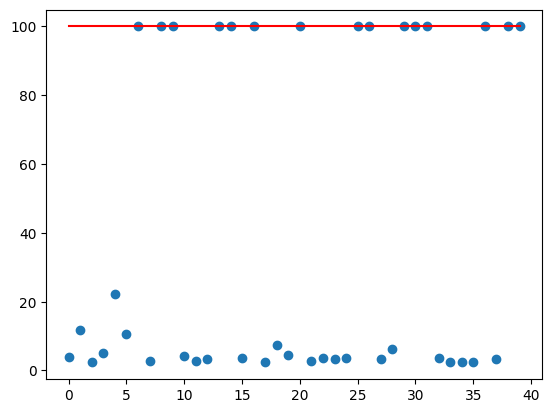

0.0


ValueError: x and y must be the same size

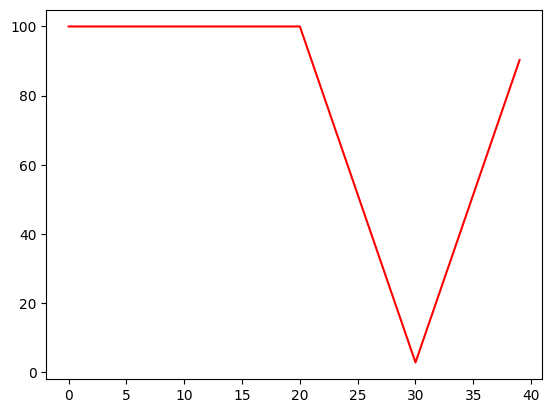

In [34]:
from numpy import genfromtxt
import sys
import random
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter


data = genfromtxt("task2_baseline1.csv", delimiter=",")
data2 = genfromtxt("task2_baseline2.csv", delimiter=",")

interference_b1 = genfromtxt("task2_interference_b1.csv", delimiter=",")
interference_b2 = genfromtxt("task2_interference_b2.csv", delimiter=",")
data.shape

error_angles1 = data[0]
error_angles2 = data2[0]

no_pert_error1 = error_angles1[0:40]
no_pert_error2 = error_angles2[0:40]

mean = np.nanmean(no_pert_error1)
std = np.nanstd(no_pert_error1)

#error_angles_1 = (error_angles1 -mean) / std

print(mean)
print(std)
adaptation = np.empty_like(error_angles1)

for error in range(len(error_angles2)):
    if (abs(error_angles2[error]) < std):
        adaptation[error] = 100
    else:
        adaptation[error] = abs(error_angles2[error])#*100

interpolated_adaptation = np.interp(np.arange(0, len(adaptation), 0.1), np.arange(0, len(adaptation)), adaptation)

#plt.plot(adaptation)
plt.plot(interpolated_adaptation,color = 'red')
plt.show()

dev = np.gradient(adaptation)

steps = 40
i = 0
while i < (len(interpolated_adaptation)-steps):

    plt.plot(interpolated_adaptation[i:i+steps],color = 'red')
    dev_mean = np.nanstd(dev[i:i+steps])
    print(dev_mean)
    plt.scatter(np.arange(0,40),adaptation[i:i+steps])

#plt.plot(error_angles1)
    plt.show()
    i = i+steps

In [3]:
from numpy import genfromtxt
import sys
import random
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

In [4]:

data = genfromtxt("task2_baseline1.csv", delimiter=",")
data2 = genfromtxt("task2_baseline2.csv", delimiter=",")

interference_b1 = genfromtxt("task2_interference_b1.csv", delimiter=",")
interference_b2 = genfromtxt("task2_interference_b2.csv", delimiter=",")
data.shape

(4, 201)

In [5]:
error_angles1 = data[0]
error_angles2 = data2[0]

ea_b1 = interference_b1[0]
ea_b2 = interference_b2[0]

no_pert_error1 = error_angles1[0:40]
no_pert_error2 = error_angles2[0:40]

mean = np.nanmean(no_pert_error1)
std = np.nanstd(no_pert_error1)

#error_angles_1 = (error_angles1 -mean) / std

#print(mean)
#print(std)

mean_b1 = np.nanmean(ea_b1)
median_b1 = np.nanmedian(ea_b1)

print('mean: ', mean_b1)
print('median: ',median_b1)




mean:  1.4539087282244592
median:  1.579895157194816


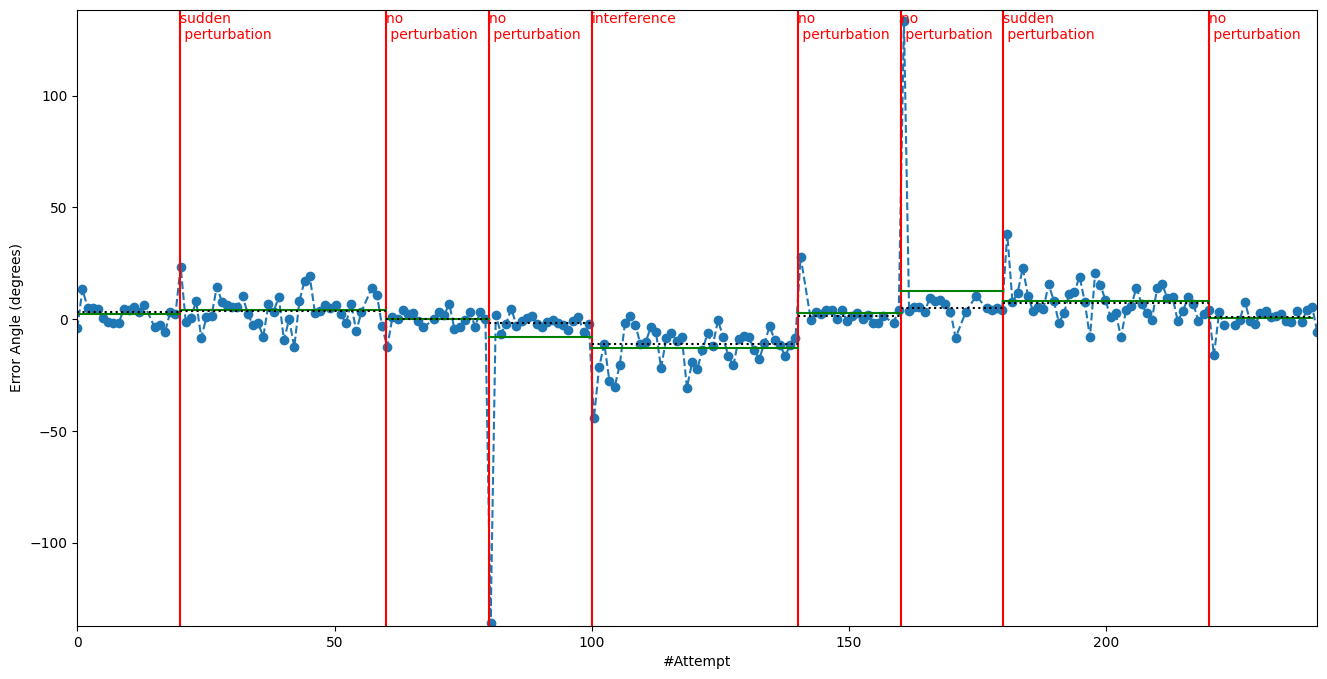

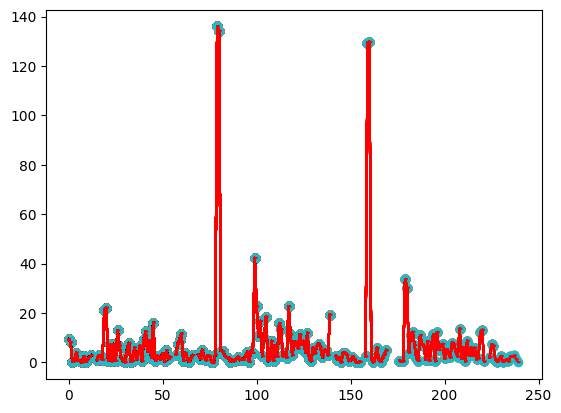

In [31]:
error_angles = ea_b2
timestamps_changes = [1,20,60,80,100,140,160,180,220,240]
timestamps_changes_full = [0,20,60,80,100,140,160,180,220,240]
ATTEMPTS_LIMIT = timestamps_changes[len(timestamps_changes)-1]+1
pertubations = ['sudden \n perturbation', 'no \n perturbation', 'no \n perturbation',  'interference', 'no \n perturbation', 'no \n perturbation',  'sudden \n perturbation', 'no \n perturbation']
    

error_angles = np.array(error_angles)
att_nr=np.linspace(0,len(error_angles),len(error_angles))
# points are connected between nan values
mask = np.isfinite(error_angles.astype(np.double))


timestamps_changes = np.array(timestamps_changes)

error_segments = []
mean_values = []
median_values = []
mov_var_list = []

# Loop to create segments and calculate mean error angle and movement variability

for i in range(len(timestamps_changes) - 1):

    start_index = int(timestamps_changes[i])
    end_index = int(timestamps_changes[i + 1])
    segment = error_angles[start_index:end_index]
    segment = np.array(segment)

    mean_value_seg = np.nanmean(segment)
    median_value_seg = np.nanmedian(segment)
    mov_var_seg = np.nanstd(segment)
    
    error_segments.append(segment)
    mean_values.append(mean_value_seg)
    median_values.append(median_value_seg)
    mov_var_list.append(mov_var_seg)




plt.figure(figsize=(16,8))
plt.plot(att_nr[mask],error_angles[mask], linestyle = 'dashed')

plt.scatter(att_nr,error_angles)
plt.xlabel('#Attempt')
plt.ylabel('Error Angle (degrees)')
plt.xlim(0,ATTEMPTS_LIMIT)
plt.ylim(np.nanmin(error_angles)-1, np.nanmax(error_angles+5))
for change in range(1, len(timestamps_changes)-1):
    plt.axvline(x=timestamps_changes[change], color='red')
    plt.text(timestamps_changes[change], np.nanmax(error_angles)+4, pertubations[change -1], color = 'red',rotation=0, va='top')


for i, mean_value in enumerate(mean_values):
    plt.axhline(mean_value, color='green', xmin=timestamps_changes_full[i] / len(att_nr), xmax=timestamps_changes_full[i + 1] / len(att_nr))
    plt.axhline(median_values[i], color='black', linestyle='dotted', xmin=timestamps_changes_full[i] / len(att_nr), xmax=timestamps_changes_full[i + 1] / len(att_nr))
    #plt.axhline(mean_value - mov_var_list[i], color='red', linestyle='dotted', xmin=timestamps_changes_full[i] / len(att_nr), xmax=timestamps_changes_full[i + 1] / len(att_nr))
    #plt.axhline(mean_value + mov_var_list[i], color='red', linestyle='dotted', xmin=timestamps_changes_full[i] / len(att_nr), xmax=timestamps_changes_full[i + 1] / len(att_nr))

    #plt.text(timestamps_changes_full[i], mean_value, f'Mean: {mean_value:.2f}', color='black', va='bottom', ha='left')

plt.savefig('reaching_task_graph_new.png')
plt.show()

delta = []

absolute_error = abs(error_angles)

for i in range(len(absolute_error)-1):
    delta.append(abs(absolute_error[i]-absolute_error[i+1]))

    interpolated_delta = np.interp(np.arange(0, len(delta), 0.1), np.arange(0, len(delta)), delta)

# Plot the original delta values
    plt.scatter(np.arange(0, len(delta)), delta, label='Original Delta')

# Plot the interpolated delta values
    plt.plot(np.arange(0, len(delta), 0.1), interpolated_delta, label='Interpolated Delta', color='red')


plt.show()

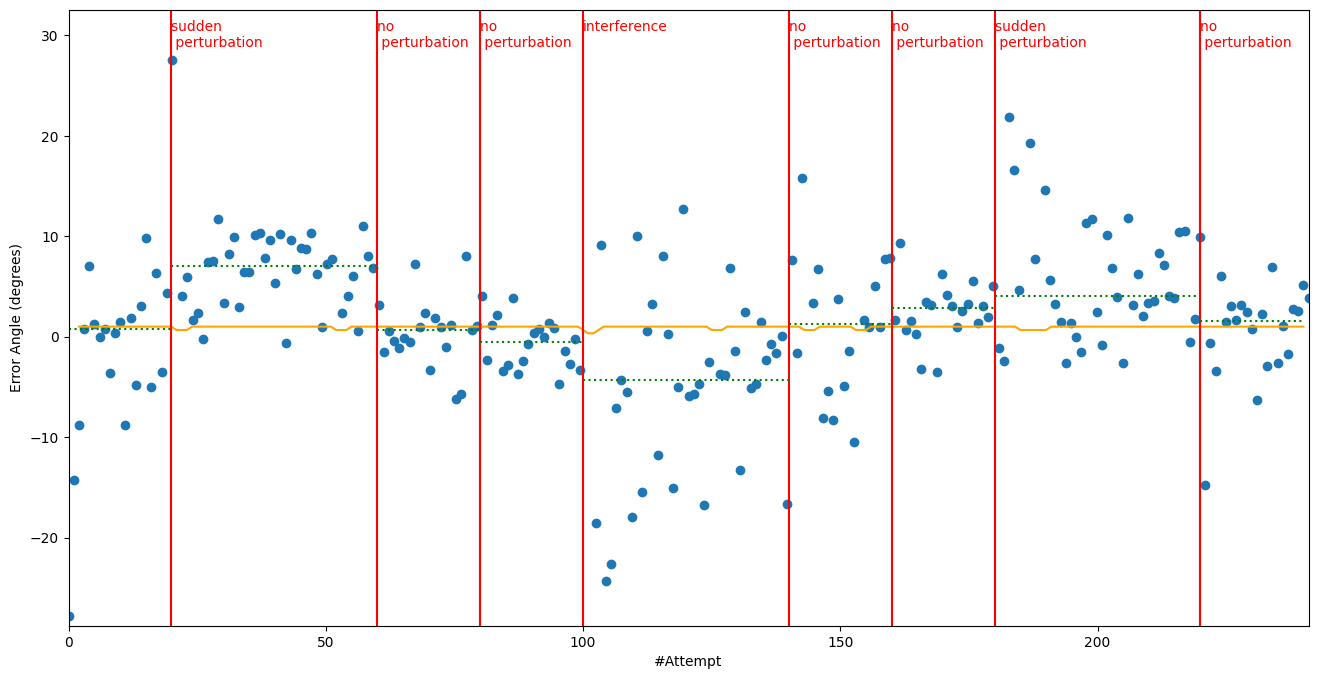

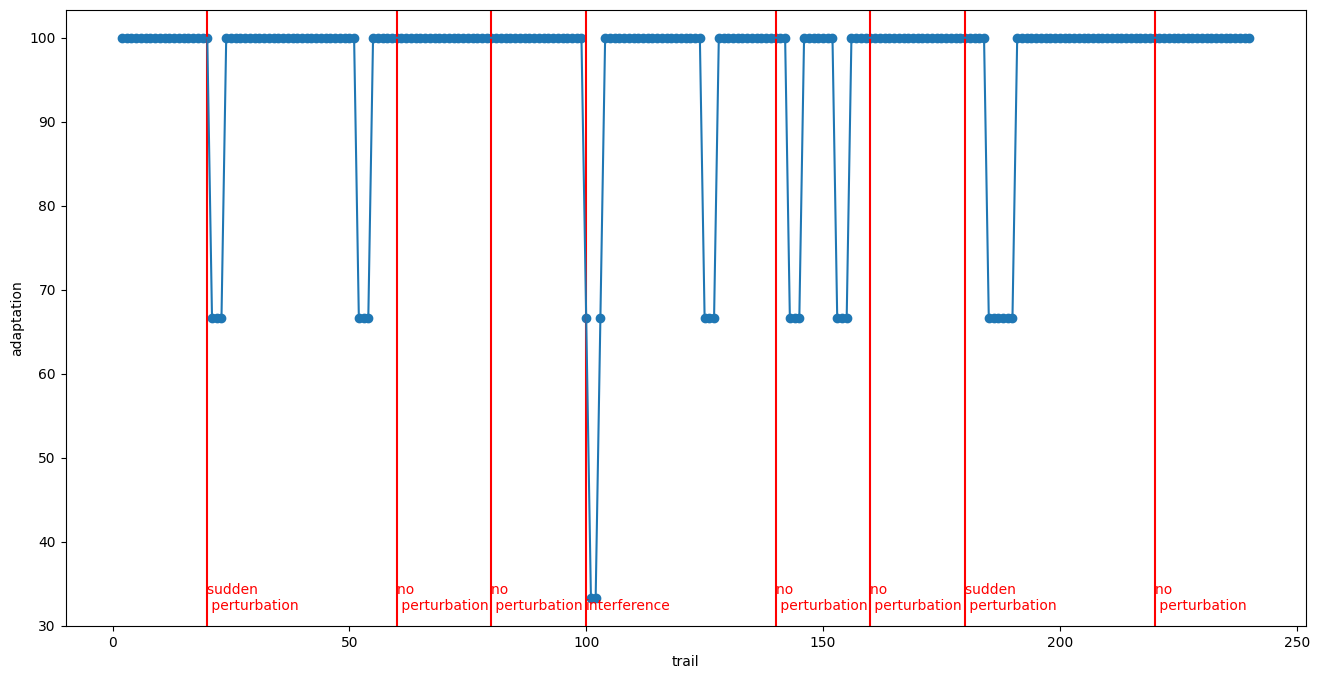

In [67]:


def running_mean(input_array, window_size):
    cumsum = np.cumsum(np.insert(input_array, 0, 0))
    moving_averages = (cumsum[window_size:] - cumsum[:-window_size]) / window_size
    
    # Pad the beginning of the result array with NaN values
    result = np.concatenate((np.full(window_size-1, np.nan), moving_averages))
    
    return result


from scipy.interpolate import UnivariateSpline
error_angles = ea_b1
timestamps_changes = [1,20,60,80,100,140,160,180,220,240]
timestamps_changes_full = [0,20,60,80,100,140,160,180,220,240]
ATTEMPTS_LIMIT = timestamps_changes[len(timestamps_changes)-1]+1
pertubations = ['sudden \n perturbation', 'no \n perturbation', 'no \n perturbation',  'interference', 'no \n perturbation', 'no \n perturbation',  'sudden \n perturbation', 'no \n perturbation']
    

error_angles = np.array(error_angles)
att_nr=np.linspace(0,len(error_angles),len(error_angles))
# points are connected between nan values
mask = np.isfinite(error_angles.astype(np.double))


timestamps_changes = np.array(timestamps_changes)

error_segments = []
mean_values = []
mov_var_list = []

# Loop to create segments and calculate mean error angle and movement variability

for i in range(len(timestamps_changes) - 1):

    start_index = int(timestamps_changes[i])
    end_index = int(timestamps_changes[i + 1])
    segment = error_angles[start_index:end_index]
    segment = np.array(segment)

    mean_value_seg = np.nanmedian(segment)
    mov_var_seg = np.nanstd(segment)
    
    error_segments.append(segment)
    mean_values.append(mean_value_seg)
    mov_var_list.append(mov_var_seg)



smooth = running_mean(mask,3)
for i in range(len(smooth)):
    if smooth[i] >1:
        print(smooth[i])
    

plt.figure(figsize=(16,8))
#plt.plot(att_nr[mask],error_angles[mask], linestyle = 'dashed')

plt.plot(np.arange(0,len(smooth)),smooth, color = 'orange')
plt.scatter(att_nr,error_angles)
plt.xlabel('#Attempt')
plt.ylabel('Error Angle (degrees)')
plt.xlim(0,ATTEMPTS_LIMIT)
plt.ylim(np.nanmin(error_angles)-1, np.nanmax(error_angles+5))
for change in range(1, len(timestamps_changes)-1):
    plt.axvline(x=timestamps_changes[change], color='red')
    plt.text(timestamps_changes[change], np.nanmax(error_angles)+4, pertubations[change -1], color = 'red',rotation=0, va='top')


for i, mean_value in enumerate(mean_values):
    plt.axhline(mean_value, color='green', linestyle='dotted', xmin=timestamps_changes_full[i] / len(att_nr), xmax=timestamps_changes_full[i + 1] / len(att_nr))
    #plt.axhline(mean_value - mov_var_list[i], color='red', linestyle='dotted', xmin=timestamps_changes_full[i] / len(att_nr), xmax=timestamps_changes_full[i + 1] / len(att_nr))
    #plt.axhline(mean_value + mov_var_list[i], color='red', linestyle='dotted', xmin=timestamps_changes_full[i] / len(att_nr), xmax=timestamps_changes_full[i + 1] / len(att_nr))

    #plt.text(timestamps_changes_full[i], mean_value, f'Median: {mean_value:.2f}', color='black', va='bottom', ha='left')


plt.savefig('reaching_task_graph_new.png')
plt.show()


plt.figure(figsize=(16,8))
for change in range(1, len(timestamps_changes)-1):
    plt.axvline(x=timestamps_changes[change], color='red')
    plt.text(timestamps_changes[change], np.nanmax(error_angles)+4, pertubations[change -1], color = 'red',rotation=0, va='bottom')


adaptation = smooth*100
plt.plot(adaptation)
plt.scatter(np.arange(0,len(adaptation)),adaptation)
plt.ylabel('adaptation')
plt.xlabel('trail')
plt.show()

38.919539882177915


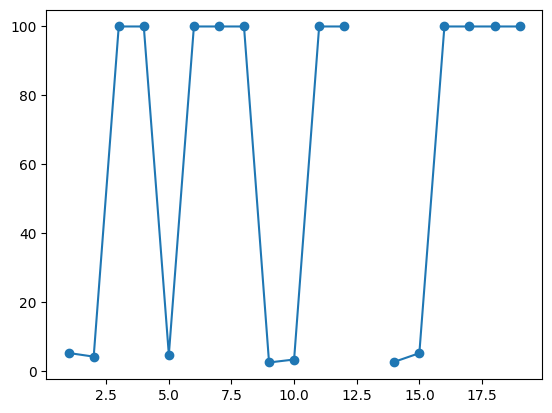

30.999740896353664


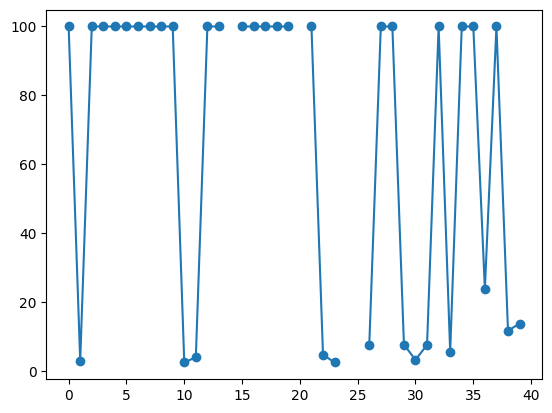

26.14525193677019


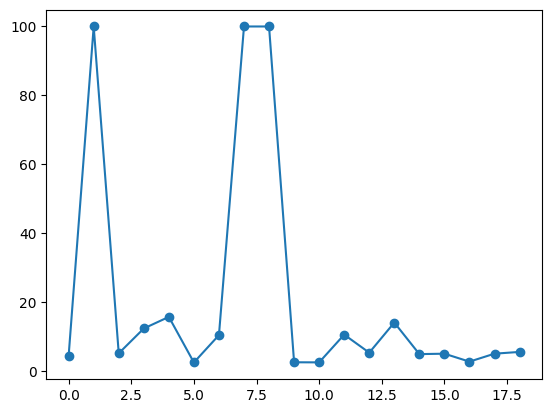

34.938912829424694


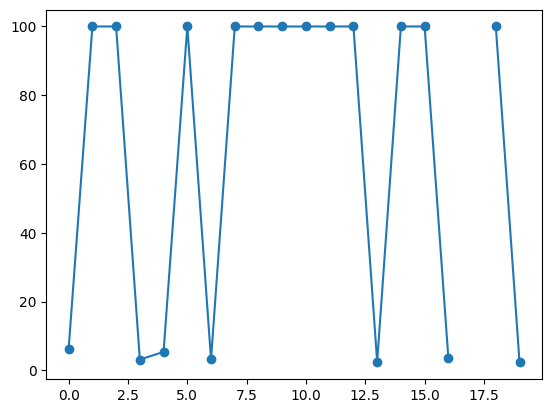

29.55605300676026


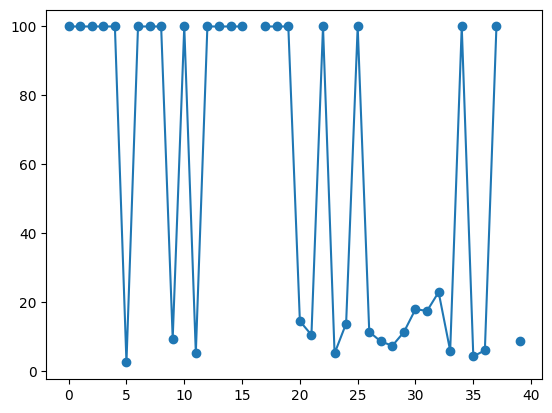

31.016787782985983


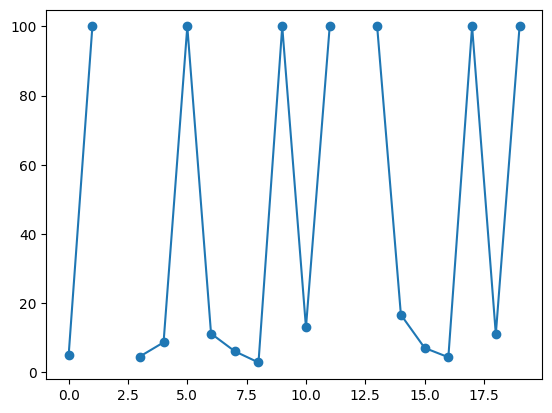

39.11011335839848


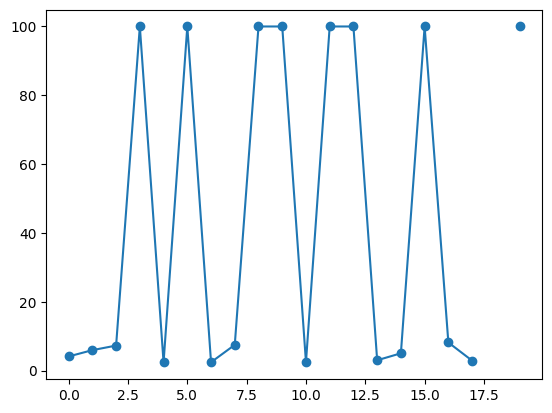

In [24]:
def plot_adaptation(error_angles1):
    adaptation = np.empty_like(error_angles1)

    for error in range(len(error_angles1)):
        if (abs(error_angles1[error]) < std):
            adaptation[error] = 100
        else:
            adaptation[error] = abs(error_angles1[error])#*100

    #plt.plot(adaptation)
    #plt.show()

    dev = np.gradient(adaptation)

    steps = [20,40,20,20,40,20,20,40,20]
    j = 0
    i = 0
    while i < (len(adaptation)-steps[j]):

        plt.plot(adaptation[i:i+steps[j]])
        dev_mean = np.nanstd(dev[i:i+steps[j]])
        print(dev_mean)
        plt.scatter(np.arange(0,steps[j]),adaptation[i:i+steps[j]])

    #plt.plot(error_angles1)
        plt.show()
        i = i+steps[j]
        j = j+1

plot_adaptation(error_angles1)